In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
cdf = pd.read_csv('bmi.csv')
cdf

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [ ]:
def convert_status_to_gender(x):
  if x['Gender'] == 'Male':
    return 1
  elif x['Gender'] == 'Female':
    return 0

cdf['Status_Gender'] = cdf.apply(convert_status_to_gender,axis=1)

def convert_status_to_index(x):
  if x['Index'] == 0:
    return 'Extremely Weak'
  elif x['Index'] == 1:
    return 'Weak'
  elif x['Index'] == 2:
    return 'Normal'
  elif x['Index'] == 3:
    return 'Overweight'
  elif x['Index'] == 4:
    return 'Obesity'
  elif x['Index'] == 5:
    return 'Extremely Obesity'

cdf['Status_Index'] = cdf.apply(convert_status_to_index,axis=1)

cdf.head()

,Gender,Height,Weight,Index,Status_Gender,Status_Index
0,Male,174,96,4,1,Obesity
1,Male,189,87,2,1,Normal
2,Female,185,110,4,0,Obesity
3,Female,195,104,3,0,Overweight
4,Male,149,61,3,1,Overweight


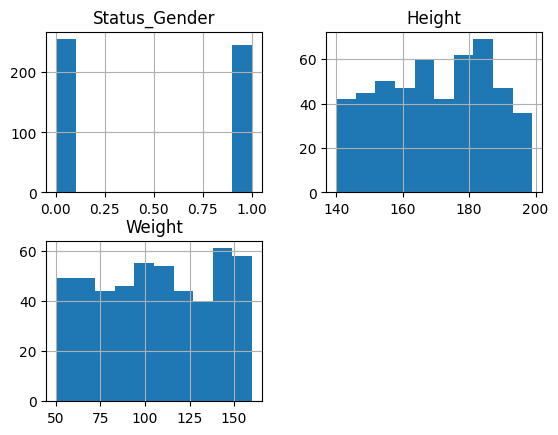

In [ ]:
vis = cdf[['Status_Gender', 'Height', 'Weight']]
vis.hist()
plt.show()

In [ ]:
cdf.describe()

,Height,Weight,Index,Status_Gender
count,500.000000,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000,0.490000
std,16.375261,32.382607,1.355053,0.500401
min,140.000000,50.000000,0.000000,0.000000
25%,156.000000,80.000000,3.000000,0.000000
50%,170.500000,106.000000,4.000000,0.000000
75%,184.000000,136.000000,5.000000,1.000000
max,199.000000,160.000000,5.000000,1.000000


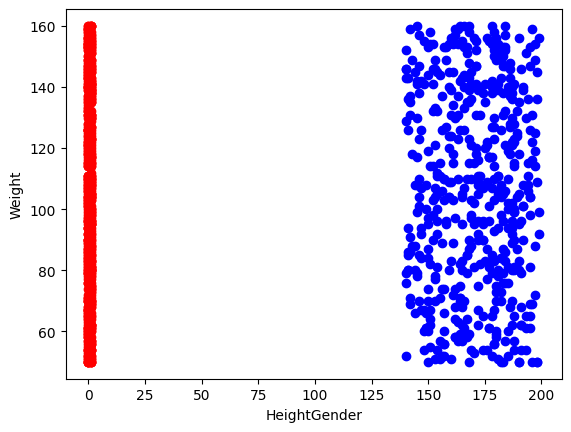

In [ ]:
plt.scatter(cdf.Height, cdf.Weight, color='blue')
plt.scatter(cdf.Status_Gender, cdf.Weight, color='red')
plt.xlabel('Height' 'Gender')
plt.ylabel('Weight')
plt.show()

In [ ]:
msk = np.random.rand(len(cdf)) < 0.7
train = cdf[msk]
test = cdf[~msk]

In [ ]:
from sklearn import linear_model 
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Status_Gender', 'Height']])
train_y = np.asanyarray(train[['Weight']])

regr.fit(train_x, train_y)
print('Coeficient : ', regr.coef_)
print('Intercept : ', regr.intercept_)

Coeficient :  [[ 0.68327993 -0.01213594]]
Intercept :  [107.70879383]


In [ ]:
test_x = np.asanyarray(test[['Status_Gender', 'Height']])
test_y = np.asanyarray(test[['Weight']])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import math

test_y_ = regr.predict(test_x)

print('Mean Squared Error (MSE) : %.2f' % mean_squared_error(test_y_,test_y))
print('Mean Absolute Error (MAE) : %.2f' % mean_absolute_error(test_y_,test_y))
print('Roots Mean Squared Error (RMSE) : %.2f' % math.sqrt(mean_squared_error(test_y_,test_y)))
print('R2-score : %.2f' % r2_score(test_y_,test_y))

Mean Squared Error (MSE) : 1105.53
Mean Absolute Error (MAE) : 28.77
Roots Mean Squared Error (RMSE) : 33.25
R2-score : -7397.10


In [ ]:
df = pd.DataFrame({'Data Sebenarnya' : np.concatenate(test_y),
                   'Data Prediksi' : np.concatenate(test_y_)})
df

,Data Sebenarnya,Data Prediksi
0,87,106.098381
1,92,106.608090
2,110,105.803451
3,145,106.644498
4,149,105.851995
...,...,...
128,108,105.621412
129,59,105.718499
130,147,105.936946
131,98,106.547410


In [ ]:
predict = regr.predict([[1, 180]])
predict

array([[106.20760407]])

In [ ]:
import joblib

model = regr
filename = 'modelbmi.sav'
joblib.dump(model, filename)

['modelbmi.sav']

In [ ]:
loaded_model = joblib.load(filename)
loaded_model.predict([[1, 180],[1, 190],[1, 190]])

array([[106.20760407],
       [106.08624465],
       [106.08624465]])